# Medical Insurance Cost with Linear Regression

Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

Pndas/
Matplotlib/
NumPy/
Data Visualization/
Seaborn/
Exploratory Data Analysis/
sklearn/
Linear Regression/
Ridge Regression/
Insurance

# Importing the nancaerys labrarys

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection & Analysis

In [2]:
pwd

'/Users/chetansingh/Downloads/Shubham/D.S Class Project /Linnear Regrassion '

In [3]:
madical= pd.read_csv('insurance.csv')

In [4]:
madical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
madical.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
madical.shape

(1338, 7)

In [7]:
madical.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
madical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
madical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
madical.notnull()

,age,sex,bmi,children,smoker,region,charges
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
1333,True,True,True,True,True,True,True
1334,True,True,True,True,True,True,True
1335,True,True,True,True,True,True,True
1336,True,True,True,True,True,True,True


In [11]:
madical.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [12]:
#Statistical Information about Categorical Columns
madical.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [13]:
madical.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [14]:
madical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
#Frequency Matrix of 'Gender' column
madical['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

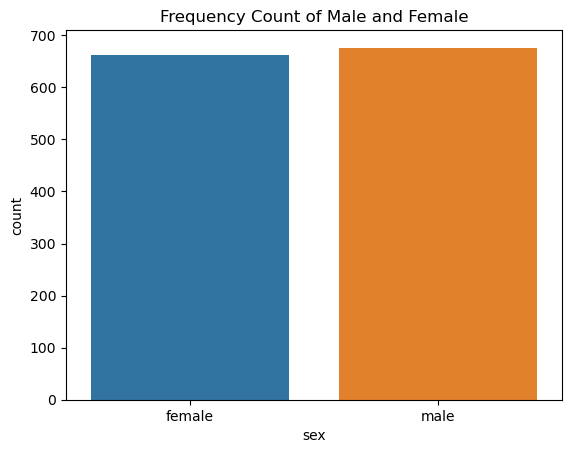

In [16]:
#Bar chart of frequency count (for Male & Female)
sns.countplot(x = 'sex' , data = madical)
plt.title('Frequency Count of Male and Female')
colors = ['#FFD700', '#8A2BE2'] 

In [17]:
#Frequency Matrix of 'age' column
madical['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

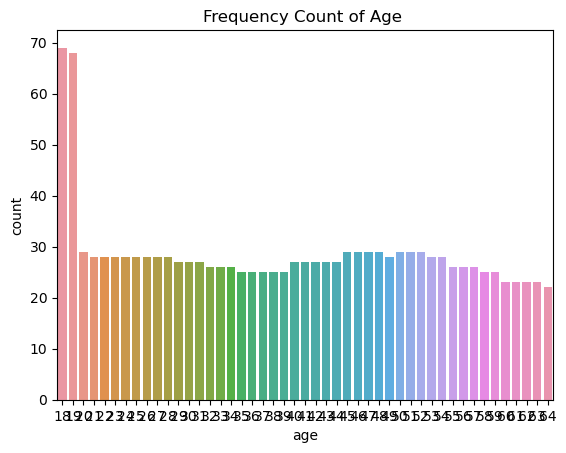

In [18]:
sns.countplot(x = 'age' , data = madical)
plt.title('Frequency Count of Age ')
colors = ['#FFD700', '#8A2BE2']

/var/folders/n9/8_4dp_dx4lxd6xq_3fmvcfq80000gn/T/ipykernel_19749/2126202647.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(madical['age'])


Text(0.5, 1.0, 'Age Distribution')

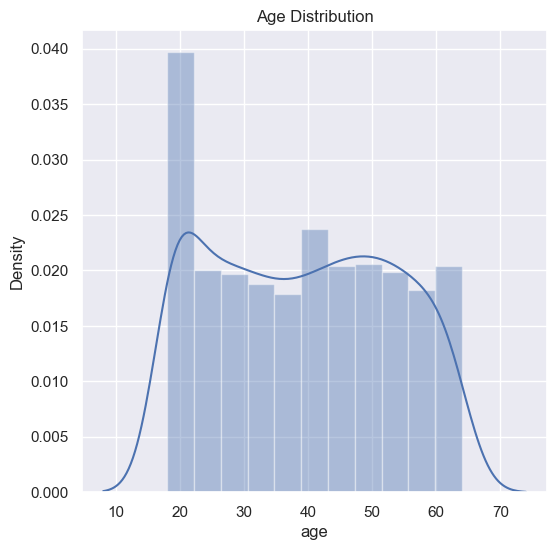

In [19]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(madical['age'])
plt.title('Age Distribution')

In [20]:
#Frequency Matrix of 'region' column
madical['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

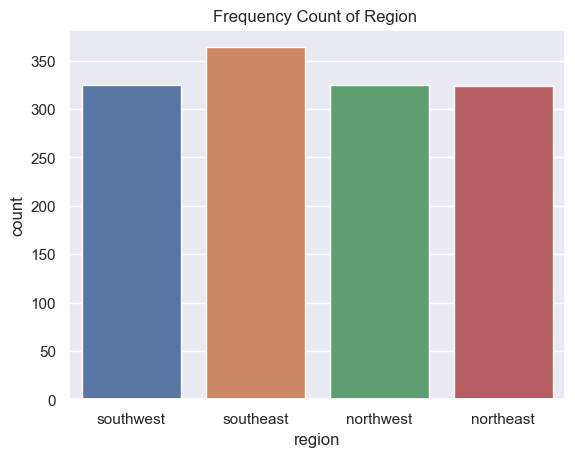

In [21]:
sns.countplot(x = 'region' , data = madical)
plt.title('Frequency Count of Region ')
colors = ['#FFD700', '#8A2BE2']

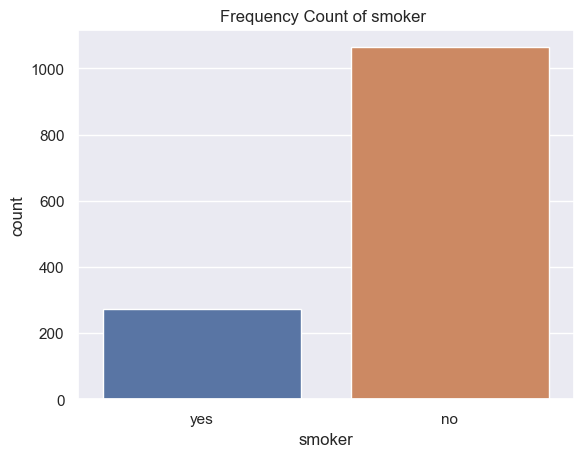

In [22]:
sns.countplot(x = 'smoker' , data = madical)
plt.title('Frequency Count of smoker ')
colors = ['#FFD700', '#8A2BE2']

In [23]:
madical['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

/var/folders/n9/8_4dp_dx4lxd6xq_3fmvcfq80000gn/T/ipykernel_19749/992120355.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(madical['bmi'])


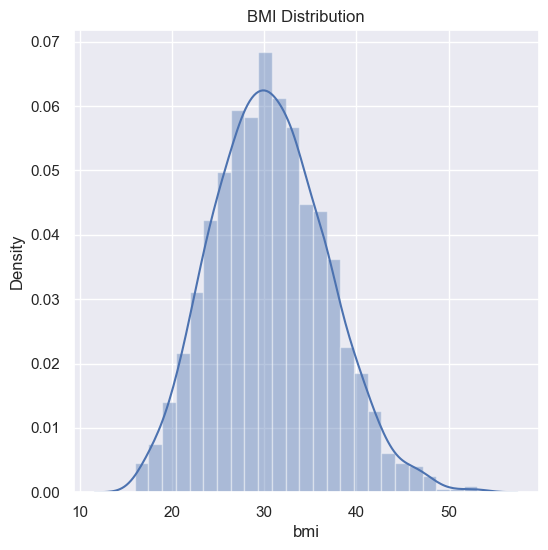

In [24]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(madical['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

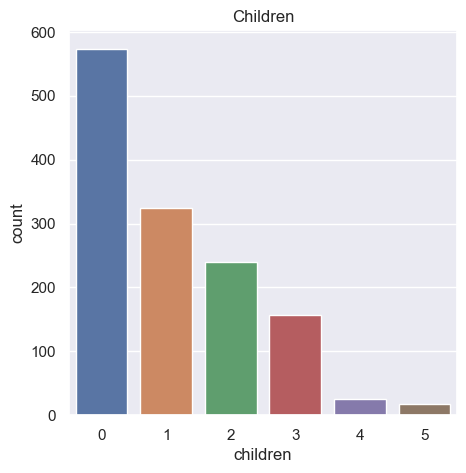

In [25]:
# children column
plt.figure(figsize=(5,5))
sns.countplot(x='children', data=madical)
plt.title('Children')
plt.show()

In [26]:
madical['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

/var/folders/n9/8_4dp_dx4lxd6xq_3fmvcfq80000gn/T/ipykernel_19749/4064789581.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(madical['charges'])


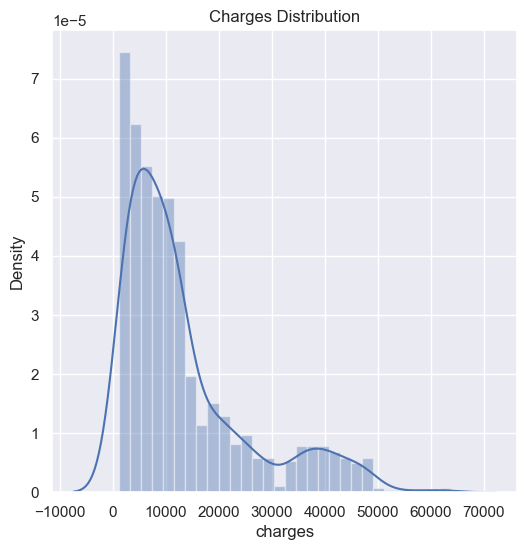

In [27]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(madical['charges'])
plt.title('Charges Distribution')
plt.show()

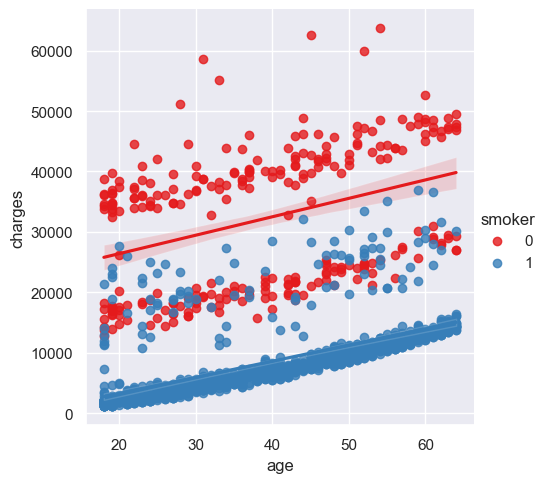

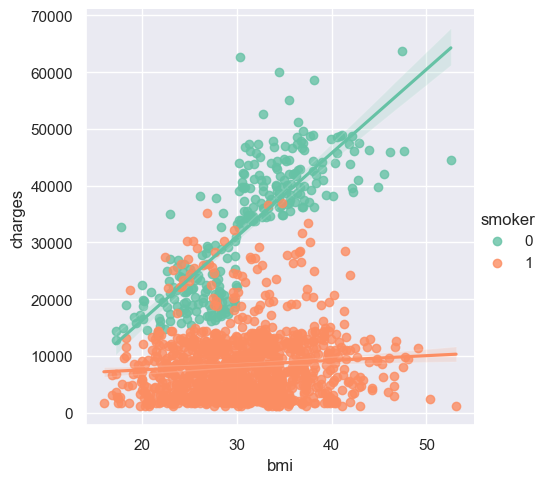

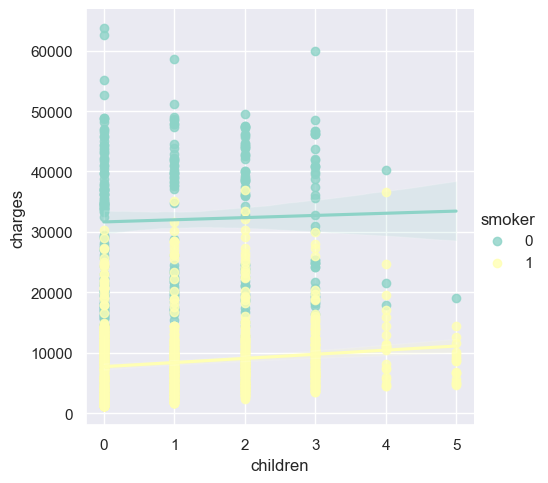

In [77]:
ax = sns.lmplot(x = 'age', y = 'charges', data=madical, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=madical, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=madical, hue='smoker', palette='Set3')

In [30]:
madical.corr()

/var/folders/n9/8_4dp_dx4lxd6xq_3fmvcfq80000gn/T/ipykernel_19749/2173106259.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  madical.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


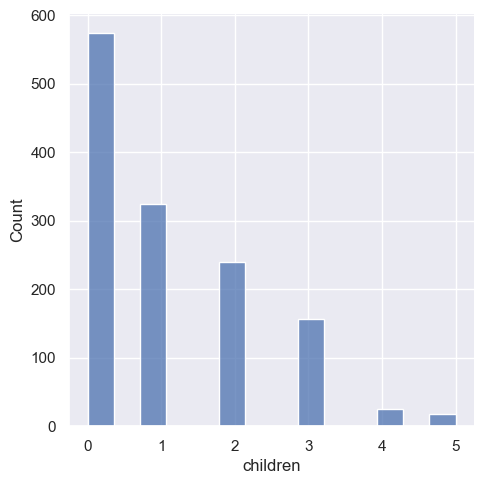

In [31]:
#Distribution Plot for "children"
sns.displot(madical['children'],kind='hist')

Text(0.5, 1.0, 'Boxplot of Age ')

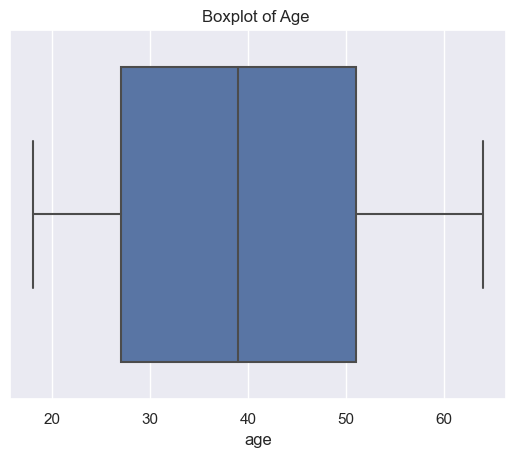

In [32]:
sns.boxplot(x=madical['age'])
plt.title("Boxplot of Age ")

Text(0.5, 1.0, 'Boxplot of BMI ')

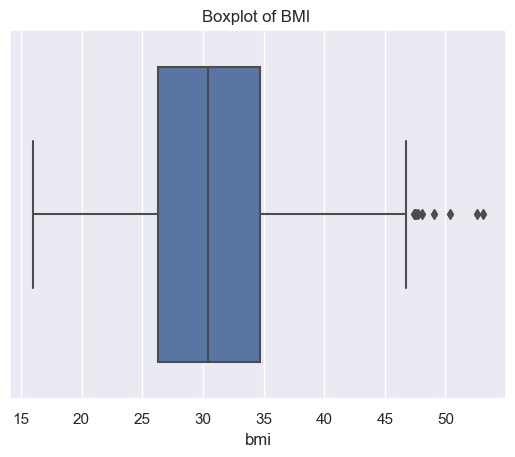

In [33]:
sns.boxplot(x=madical['bmi'])
plt.title("Boxplot of BMI ")

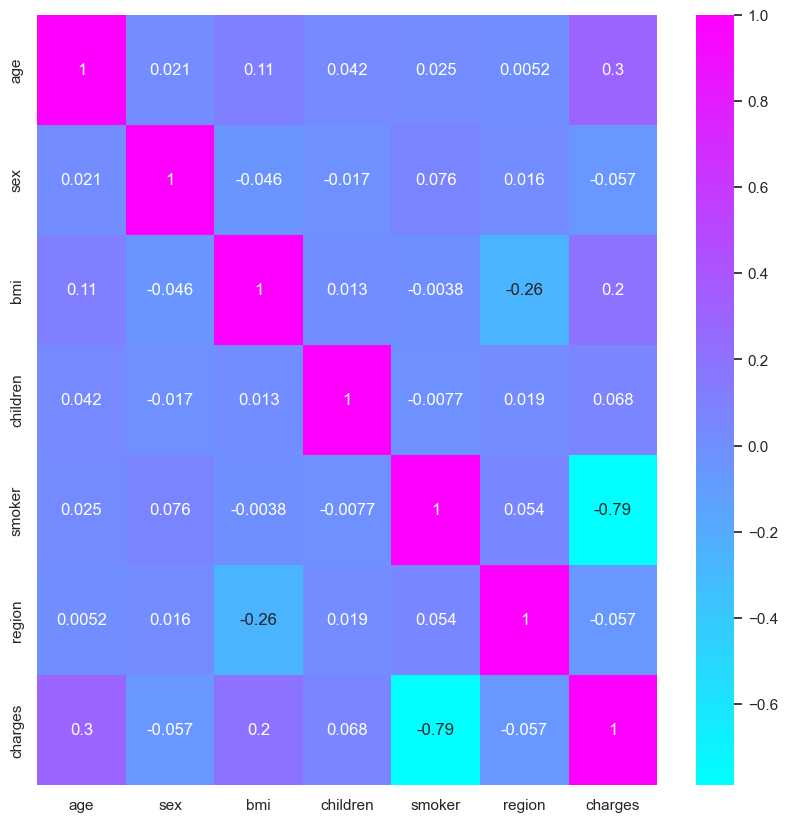

In [80]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(madical.corr(), annot=True, cmap='cool')


In [39]:
1 # encoding sex column
madical.replace({'sex':{'male':0,'female':1}}, inplace=True)

2 # encoding 'smoker' column
madical.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

3 # encoding 'region' column
madical.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

# Splitting the Features and Target



In [40]:
x = madical.drop(columns='charges', axis=1)
y = madical['charges']

In [41]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [42]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Splitting the data into Training data & Testing Data



In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.70,random_state=2) 
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (936, 6) (402, 6)


# Model Training

Linear Regression

In [56]:
# loading the Linear Regression model
regressor = LinearRegression()

regressor.fit(x_train, y_train)

LinearRegression()

# Model Evaluation


# Linear Regression

In [57]:
# prediction on training data
training_data_prediction =regressor.predict(x_train)

# R squared value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7415730843556845


In [93]:
print(regressor.coef_)
print(regressor.score(x_test, y_test))

[   244.92327173    113.95426496    340.08819797    611.17594904
 -23389.2680485     180.61422029]
0.7661186068101189


In [58]:
# prediction on test data
test_data_prediction =regressor.predict(x_test)

# R squared value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7661186068101189


The result we got is good enough, but we can try to improve it a bit by reducing unimportant features later

# Ridge Regression

In [94]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

10761.808977958124
[   244.84036373    109.28443921    340.02588078    611.27649995
 -23311.96702457    179.55121281]
0.7658678314402124


                                               THANK YOU 